Importing librabries

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

Databsase Connection

In [166]:
# creating database connection
conn = sqlite3.connect('yelp.db')

In [167]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master where type = 'table'", conn)

In [168]:
tables

,name
0,business
1,review
2,user
3,checkin
4,tip


In [169]:
# explore what type of data available in the tables

for table in tables ['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn)) 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Data Analysis

In [170]:
pd.read_sql_query("select count(*) from business", conn)

,count(*)
0,150346


In [171]:
business_id_df = pd.read_sql_query("""
SELECT business_id, review_count
FROM business 
WHERE LOWER(categories) LIKE '%restaurant%' AND is_open = 1
""", conn)

In [172]:
# what is the descriptive stats for review count and star rating for businesses?
# avg, min, max, median

pd.read_sql_query(f"""
SELECT 
    AVG(review_count) AS average_review_count,
    MIN(review_count) AS min_review_count,
    MAX(review_count) AS max_review_count,
    (SELECT review_count 
     FROM business 
     ORDER BY review_count 
     LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,

    AVG(stars) AS average_star_rating,
    MIN(stars) AS min_star_rating,
    MAX(stars) AS max_star_rating,
    (SELECT stars 
     FROM business 
     ORDER BY stars 
     LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating

FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()


,0
average_review_count,None
min_review_count,None
max_review_count,None
median_review_count,15
average_star_rating,None
min_star_rating,None
max_star_rating,None
median_star_rating,3.5


In [173]:
def remove_outliers(df, col, multiplier=1.5):  # Added multiplier parameter
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found")
        return df
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    print(f"Bounds for '{col}': Lower = {lower_bound}, Upper = {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [174]:
business_id_clean = remove_outliers(business_id_df, 'review_count')

Bounds for 'review_count': Lower = -123.5, Upper = 248.5


In [175]:
business_id.shape

(0, 1)

In [176]:
#witch restaurants have the highest ratings?

pd.read_sql_query(f"""
SELECT name, 
       SUM(review_count) AS review_count, 
       AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id_df['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10
""", conn)


,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [177]:
# Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql_query("""
SELECT business_id,
       (LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count
FROM checkin
GROUP BY business_id
""", conn)


,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [178]:
pd.read_sql_query("""
SELECT business_id, count(*) as tip_count
FROM tip
GROUP BY business_id
""", conn)


,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [179]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

,name
0,business
1,review
2,user
3,checkin
4,tip


In [180]:
# First verify the connection and table
print("Connection:", conn)
print("Table exists:", pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' AND name='business'", conn))
print("Row count:", pd.read_sql_query("SELECT COUNT(*) FROM business", conn).iloc[0,0])

# Option 1: For all businesses (with debug print)
try:
    stats = pd.read_sql_query("""
        SELECT
            AVG(review_count) AS avg_review_count,
            MIN(review_count) AS min_review_count,
            MAX(review_count) AS max_review_count,
            (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
            
            AVG(stars) AS average_star_rating,
            MIN(stars) AS min_star_rating,
            MAX(stars) AS max_star_rating,
            (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
        FROM business
    """, conn).transpose()
    print("\nResults for all businesses:")
    print(stats)
except Exception as e:
    print("\nError in Option 1:", str(e))

# Option 2: For specific businesses (with example IDs)
try:
    # First get some actual business IDs from your database
    business_ids = pd.read_sql_query("SELECT business_id FROM business LIMIT 3", conn)['business_id'].tolist()
    print("\nUsing business IDs:", business_ids)
    
    stats_filtered = pd.read_sql_query(f"""
        SELECT
            AVG(review_count) AS avg_review_count,
            MIN(review_count) AS min_review_count,
            MAX(review_count) AS max_review_count,
            (SELECT review_count FROM business WHERE business_id IN ({','.join(['?']*len(business_ids))}) 
                ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business WHERE business_id IN ({','.join(['?']*len(business_ids))})) / 2) AS median_review_count,
            
            AVG(stars) AS average_star_rating,
            MIN(stars) AS min_star_rating,
            MAX(stars) AS max_star_rating,
            (SELECT stars FROM business WHERE business_id IN ({','.join(['?']*len(business_ids))}) 
                ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business WHERE business_id IN ({','.join(['?']*len(business_ids))})) / 2) AS median_star_rating
        FROM business
        WHERE business_id IN ({','.join(['?']*len(business_ids))})
    """, conn, params=business_ids*5).transpose()  # 5 times because we use the parameter 5 times in the query
    
    print("\nResults for filtered businesses:")
    print(stats_filtered)
except Exception as e:
    print("\nError in Option 2:", str(e))

Connection: <sqlite3.Connection object at 0x0000012D04B99120>
Table exists:        name
0  business
Row count: 150346

Results for all businesses:
                               0
avg_review_count       44.866561
min_review_count        5.000000
max_review_count     7568.000000
median_review_count    15.000000
average_star_rating     3.596724
min_star_rating         1.000000
max_star_rating         5.000000
median_star_rating      3.500000

Using business IDs: ['Pns2l4eNsfO8kk83dixA6A', 'mpf3x-BjTdTEA3yCZrAYPw', 'tUFrWirKiKi_TAnsVWINQQ']

Results for filtered businesses:
                             0
avg_review_count     14.666667
min_review_count      7.000000
max_review_count     22.000000
median_review_count  15.000000
average_star_rating   3.833333
min_star_rating       3.000000
max_star_rating       5.000000
median_star_rating    3.500000


In [181]:
# Which restaurants have the highest numbe of reviews?

top_restaurants = pd.read_sql_query("""
    SELECT name, 
           SUM(review_count) as review_count, 
           AVG(stars) as avg_rating
    FROM business
    GROUP BY name
    ORDER BY review_count DESC
    LIMIT 10
""", conn)

print(top_restaurants)

                     name  review_count  avg_rating
0               Starbucks         20692    3.126381
1              McDonald's         17359    1.863442
2                 Dunkin'          9864    2.302941
3  Chipotle Mexican Grill          9383    2.426282
4             First Watch          8921    3.900000
5       Acme Oyster House          8372    3.833333
6               Taco Bell          8325    2.154795
7             Chick-fil-A          8004    3.385802
8            Oceana Grill          7400    4.000000
9            Panera Bread          7246    2.675214


In [182]:
# Which restaurants have the highest rating?
best_overall = pd.read_sql_query("""
    SELECT name, 
           AVG(stars) as avg_rating,
           SUM(review_count) as review_count,
           (AVG(stars) * LOG(SUM(review_count) + 1)) as score  -- Balances rating and popularity
    FROM business
    GROUP BY name
    HAVING SUM(review_count) >= 20  -- Minimum reviews
    ORDER BY score DESC
    LIMIT 10
""", conn)

print(best_overall)

                                 name  avg_rating  review_count      score
0  Hattie B’s Hot Chicken - Nashville    4.500000          6093  17.032061
1             Reading Terminal Market    4.500000          5721  16.908965
2          Ruby Slipper - New Orleans    4.500000          5193  16.719759
3                  Commander's Palace    4.500000          4876  16.596687
4                  Pappy's Smokehouse    4.500000          3999  16.209270
5           Willie Mae's Scotch House    4.500000          3582  15.994111
6                               Zahav    4.500000          3065  15.689575
7                   Ruby Slipper Cafe    4.166667          5800  15.681262
8                  Bern's Steak House    4.500000          2924  15.597566
9                            Barbuzzo    4.500000          2893  15.576743


In [183]:
query = """
SELECT 
    total.avg_rating AS rating,
    AVG(total.review_count) AS avg_review_count,
    AVG(total.checkin_count) AS avg_checkin_count,
    AVG(total.tip_count) AS avg_tip_count
FROM (
    SELECT 
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(COALESCE(tip.tip_count, 0)) AS tip_count
    FROM 
        business b
    LEFT JOIN 
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN (
        SELECT business_id, COUNT(*) AS tip_count
        FROM tip
        GROUP BY business_id
    ) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN (SELECT business_id FROM business)
    GROUP BY 
        b.business_id
) AS total
GROUP BY total.avg_rating;
"""

df = pd.read_sql_query(query, conn)
print(df)

   rating  avg_review_count  avg_checkin_count  avg_tip_count
0     1.0         13.444109         193.135246       0.674723
1     1.5         20.527372         521.717093       1.900041
2     2.0         21.947937         822.500916       2.456282
3     2.5         27.093951        1319.985836       3.579631
4     3.0         36.119547        1856.813174       5.362380
5     3.5         51.179268        2471.275427       7.599268
6     4.0         71.465863        3283.392488      10.075791
7     4.5         55.333726        2082.497950       6.915382
8     5.0         16.462501         414.615189       1.318697


In [184]:
df = pd.read_sql_query(query, conn)

In [185]:
review_count_df = pd.read_sql_query(query, conn)

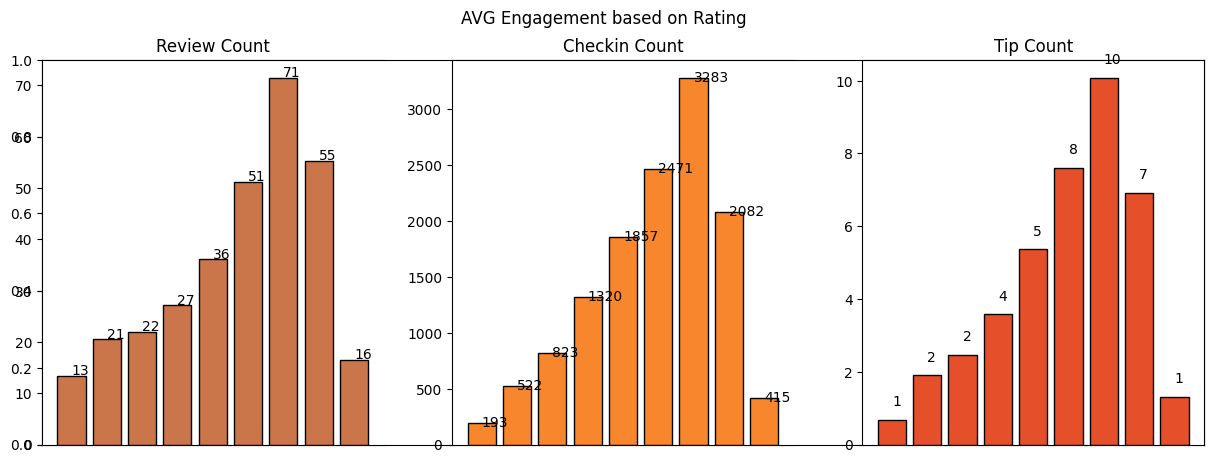

In [186]:
plt.figure(figsize=(15, 5))
plt.suptitle('AVG Engagement based on Rating\n\n')
plt.xticks([])

# Subplot 1: Review Count
plt.subplot(1, 3, 1)
plt.title('Review Count')
plt.bar(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor='k', color='#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(i, value + 1, str(round(value)), color='black', va='center')

plt.xticks([])

# Subplot 2: Check-in Count
plt.subplot(1, 3, 2)
plt.title('Checkin Count')
plt.bar(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(i, value + 3, str(round(value)), color='black', va='center')

plt.xticks([])

# Subplot 3: Tip Count
plt.subplot(1, 3, 3)
plt.title('Tip Count')
plt.bar(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor='k', color='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(i, value + 0.5, str(round(value)), color='black', va='center')

plt.xticks([])
plt.show()


In [234]:
# Step 1: Read the data from the database into engagement_df
engagement_df = pd.read_sql_query("""
SELECT 
    b.business_id,
    b.name,
    b.review_count,
    b.stars AS avg_rating,
    CASE 
        WHEN cc.date IS NULL THEN 0
        ELSE LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1
    END AS checkin_count,
    CASE
        WHEN t.tip_count IS NULL THEN 0
        ELSE t.tip_count
    END AS tip_count
FROM 
    business b
LEFT JOIN 
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN (
    SELECT business_id, COUNT(*) AS tip_count
    FROM tip
    GROUP BY business_id
) t ON b.business_id = t.business_id
WHERE 
    b.categories LIKE '%Restaurants%'
""", conn)

# Step 2: Create category column
engagement_df['category'] = engagement_df['avg_rating'].apply(
    lambda x: 'High Rated (4.0+)' if x >= 4.0 else 'Low Rated (<4.0)'
)

# Step 3: Group by category and compute mean engagement
category_engagement = engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()
print("\nAverage Engagement by Rating Category:")
print(category_engagement)

# Step 4: Calculate correlations (using the correct dataframe name)
print("\nCorrelation Matrix:")
correlation_matrix = engagement_df[['review_count', 'tip_count', 'checkin_count']].corr()
print(correlation_matrix)


Average Engagement by Rating Category:
                   review_count  tip_count  checkin_count
category                                                 
High Rated (4.0+)    120.136072  16.270002     212.524028
Low Rated (<4.0)      60.731051   9.311134     122.860166

Correlation Matrix:
               review_count  tip_count  checkin_count
review_count       1.000000   0.842213       0.816050
tip_count          0.842213   1.000000       0.904635
checkin_count      0.816050   0.904635       1.000000


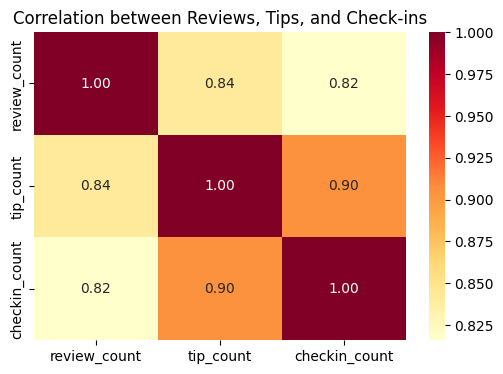

In [238]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation between Reviews, Tips, and Check-ins")
plt.show()


In [239]:
# Is there a difference in the user engement (reviews, tips, and check-ins) bestween high-rated and low-rated and low-rated businesses?
engagement_df['category'] = engagement_df['avg_rating'].apply(lambda x: 'High Rated' if x >= 4.0 else 'Low Rated')

result = engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()

print(result)


            review_count  tip_count  checkin_count
category                                          
High Rated    120.136072  16.270002     212.524028
Low Rated      60.731051   9.311134     122.860166


In [240]:
# function to calculate the success score based on the avg rating and review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [241]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?
# Suppose you've already filtered restaurant businesses into a DataFrame:
restaurant_df = pd.read_sql_query("SELECT business_id FROM business WHERE categories LIKE '%Restaurant%'", conn)

# Now get the tuple of business IDs
business_ids = tuple(restaurant_df['business_id'].values)

query = f"""
SELECT city, state, longitude, longitude,
       AVG(stars) AS avg_rating, 
       SUM(review_count) AS review_count,
       COUNT(*) AS restaurant_count
FROM business
WHERE business_id IN {business_ids}
GROUP BY state, city
ORDER BY review_count DESC
LIMIT 10
"""

city_df = pd.read_sql_query(query, conn)
city_df['success_score'] = calculate_success_metric(city_df)
print(city_df)

            city state   longitude   longitude  avg_rating  review_count  \
0   Philadelphia    PA  -75.155564  -75.155564    3.556030        665749   
1    New Orleans    LA  -90.074427  -90.074427    3.744027        465988   
2      Nashville    TN  -86.768170  -86.768170    3.564323        318560   
3          Tampa    FL  -82.505053  -82.505053    3.603512        293130   
4   Indianapolis    IN  -86.127217  -86.127217    3.490566        242024   
5         Tucson    AZ -110.999985 -110.999985    3.462753        238902   
6           Reno    NV -119.789339 -119.789339    3.576475        191056   
7    Saint Louis    MO  -90.212784  -90.212784    3.504746        171785   
8  Santa Barbara    CA -119.690672 -119.690672    3.827901        158247   
9          Boise    ID -116.206275 -116.206275    3.589517         64383   

   restaurant_count  success_score  
0              5854      47.681632  
1              2260      48.866725  
2              2503      45.165563  
3              

In [242]:
# Ensure clean numeric data
city_df['latitude'] = pd.to_numeric(city_df['latitude'], errors='coerce')
city_df['longitude'] = pd.to_numeric(city_df['longitude'], errors='coerce')
city_df = city_df.dropna(subset=['latitude', 'longitude'])

# Get center point
lat_mean = city_df['latitude'].mean()
lon_mean = city_df['longitude'].mean()

# Create map
m = folium.Map(location=[lat_mean, lon_mean], zoom_start=4)

# Color scale
color_scale = folium.LinearColormap(
    colors=['green', 'yellow', '#EFAF29'],
    vmin=city_df['success_score'].min(),
    vmax=city_df['success_score'].max()
)

# Add markers
for _, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

m.add_child(color_scale)
m

KeyError: 'latitude'

In [243]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful once?
# Are there any seasonal tresndl in the user engagement for restaurants?

import pandas as pd

# First get the business IDs we want to analyze - replace with actual criteria
business_ids = pd.read_sql_query("""
    SELECT DISTINCT business_id 
    FROM business
    WHERE categories LIKE '%Restaurants%'
    LIMIT 1000  /* Remove or increase this limit for production */
""", conn)

# Check if we got any business IDs
if len(business_ids) == 0:
    raise ValueError("No businesses found with the specified criteria")

# Convert to SQL-friendly format
id_list = ",".join([f"'{bid}'" for bid in business_ids['business_id']])

# HIGH RATED ENGAGEMENT (stars >= 3.5)
high_rated_query = f"""
    WITH review_counts AS (
        SELECT 
            strftime('%m-%Y', date) AS month_year,
            COUNT(*) AS review_count
        FROM review
        WHERE business_id IN ({id_list})
        AND stars >= 3.5
        GROUP BY month_year
    ),
    tip_counts AS (
        SELECT
            strftime('%m-%Y', t.date) AS month_year,
            COUNT(*) AS tip_count
        FROM tip t
        JOIN business b ON t.business_id = b.business_id
        WHERE t.business_id IN ({id_list})
        AND b.stars >= 3.5
        GROUP BY month_year
    )
    SELECT
        COALESCE(r.month_year, t.month_year) AS month_year,
        COALESCE(r.review_count, 0) AS review_count,
        COALESCE(t.tip_count, 0) AS tip_count,
        COALESCE(r.review_count, 0) + COALESCE(t.tip_count, 0) AS total_engagement
    FROM review_counts r
    FULL OUTER JOIN tip_counts t ON r.month_year = t.month_year
    ORDER BY month_year
"""

# LOW RATED ENGAGEMENT (stars < 3.5)
low_rated_query = f"""
    WITH review_counts AS (
        SELECT 
            strftime('%m-%Y', date) AS month_year,
            COUNT(*) AS review_count
        FROM review
        WHERE business_id IN ({id_list})
        AND stars < 3.5
        GROUP BY month_year
    ),
    tip_counts AS (
        SELECT
            strftime('%m-%Y', t.date) AS month_year,
            COUNT(*) AS tip_count
        FROM tip t
        JOIN business b ON t.business_id = b.business_id
        WHERE t.business_id IN ({id_list})
        AND b.stars < 3.5
        GROUP BY month_year
    )
    SELECT
        COALESCE(r.month_year, t.month_year) AS month_year,
        COALESCE(r.review_count, 0) AS review_count,
        COALESCE(t.tip_count, 0) AS tip_count,
        COALESCE(r.review_count, 0) + COALESCE(t.tip_count, 0) AS total_engagement
    FROM review_counts r
    FULL OUTER JOIN tip_counts t ON r.month_year = t.month_year
    ORDER BY month_year
"""

try:
    high_rated_engagement = pd.read_sql_query(high_rated_query, conn)
    low_rated_engagement = pd.read_sql_query(low_rated_query, conn)
    
    print("High Rated Engagement (stars >= 3.5):")
    display(high_rated_engagement.head())
    
    print("\nLow Rated Engagement (stars < 3.5):")
    display(low_rated_engagement.head())
    
except Exception as e:
    print(f"Error executing queries: {str(e)}")
    # Print the queries for debugging
    print("\nHigh rated query:")
    print(high_rated_query)
    print("\nLow rated query:")
    print(low_rated_query)

High Rated Engagement (stars >= 3.5):


,month_year,review_count,tip_count,total_engagement
0,01-2006,1,0,1
1,01-2007,4,0,4
2,01-2008,15,0,15
3,01-2009,66,0,66
4,01-2010,100,5,105



Low Rated Engagement (stars < 3.5):


,month_year,review_count,tip_count,total_engagement
0,01-2007,6,0,6
1,01-2008,10,0,10
2,01-2009,32,0,32
3,01-2010,48,1,49
4,01-2011,99,17,116


In [244]:
import pandas as pd

# First get the business IDs we want to analyze
business_ids = pd.read_sql_query("""
    SELECT DISTINCT business_id 
    FROM business
    WHERE categories LIKE '%Restaurants%'
    LIMIT 1000  /* Remove or increase this limit for production */
""", conn)

# Check if we got any business IDs
if len(business_ids) == 0:
    raise ValueError("No businesses found with the specified criteria")

# Convert to SQL-friendly format (two options):

# Option 1: For small lists - using string formatting
id_list = ",".join([f"'{bid}'" for bid in business_ids['business_id']])

# Option 2: For larger lists - using parameterized query (recommended)
id_tuple = tuple(business_ids['business_id'])
if len(id_tuple) == 1:  # Handle single-item tuple case
    id_tuple = f"('{id_tuple[0]}')"

# Query for time-based rating analysis
time_rating_query = f"""
    SELECT 
        strftime('%m-%Y', date) AS month_year, 
        AVG(stars) as avg_rating,
        COUNT(*) as review_count
    FROM review
    WHERE business_id IN ({id_list})  /* Using Option 1 */
    /* OR: WHERE business_id IN {id_tuple} */  /* Using Option 2 */
    GROUP BY month_year
    ORDER BY month_year
"""

try:
    time_rating = pd.read_sql_query(time_rating_query, conn)
    print("Time-based Rating Analysis:")
    display(time_rating.head())
    
except Exception as e:
    print(f"Error executing query: {str(e)}")
    print("\nQuery was:")
    print(time_rating_query)

Time-based Rating Analysis:


,month_year,avg_rating,review_count
0,01-2006,4.000000,1
1,01-2007,3.200000,10
2,01-2008,3.480000,25
3,01-2009,3.683673,98
4,01-2010,3.750000,148


In [245]:
# Convert and filter time_rating data
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'], format='%m-%Y')
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year'] > pd.to_datetime('2017-01-01')]  # More precise date filtering

# Convert and filter high_rated_engagement data
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'], format='%m-%Y')
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > pd.to_datetime('2017-01-01')]

# Convert and filter low_rated_engagement data
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'], format='%m-%Y')
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > pd.to_datetime('2017-01-01')]

# Reset indices after filtering
time_rating.reset_index(drop=True, inplace=True)
high_rated_engagement.reset_index(drop=True, inplace=True)
low_rated_engagement.reset_index(drop=True, inplace=True)

# Display the filtered data
print("Time Rating Data (after 2017):")
print(time_rating.head())
print("\nHigh Rated Engagement (after 2017):")
print(high_rated_engagement.head())
print("\nLow Rated Engagement (after 2017):")
print(low_rated_engagement.head())

Time Rating Data (after 2017):
  month_year  avg_rating  review_count
0 2017-02-01    3.859931           871
1 2017-03-01    3.768267           958
2 2017-04-01    3.859244           952
3 2017-05-01    3.750522           958
4 2017-06-01    3.811262           959

High Rated Engagement (after 2017):
  month_year  review_count  tip_count  total_engagement
0 2017-02-01           606         98               704
1 2017-03-01           647        114               761
2 2017-04-01           660        110               770
3 2017-05-01           635        107               742
4 2017-06-01           653        119               772

Low Rated Engagement (after 2017):
  month_year  review_count  tip_count  total_engagement
0 2017-02-01           265         19               284
1 2017-03-01           311         17               328
2 2017-04-01           292         18               310
3 2017-05-01           323         17               340
4 2017-06-01           306         21         

In [ ]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

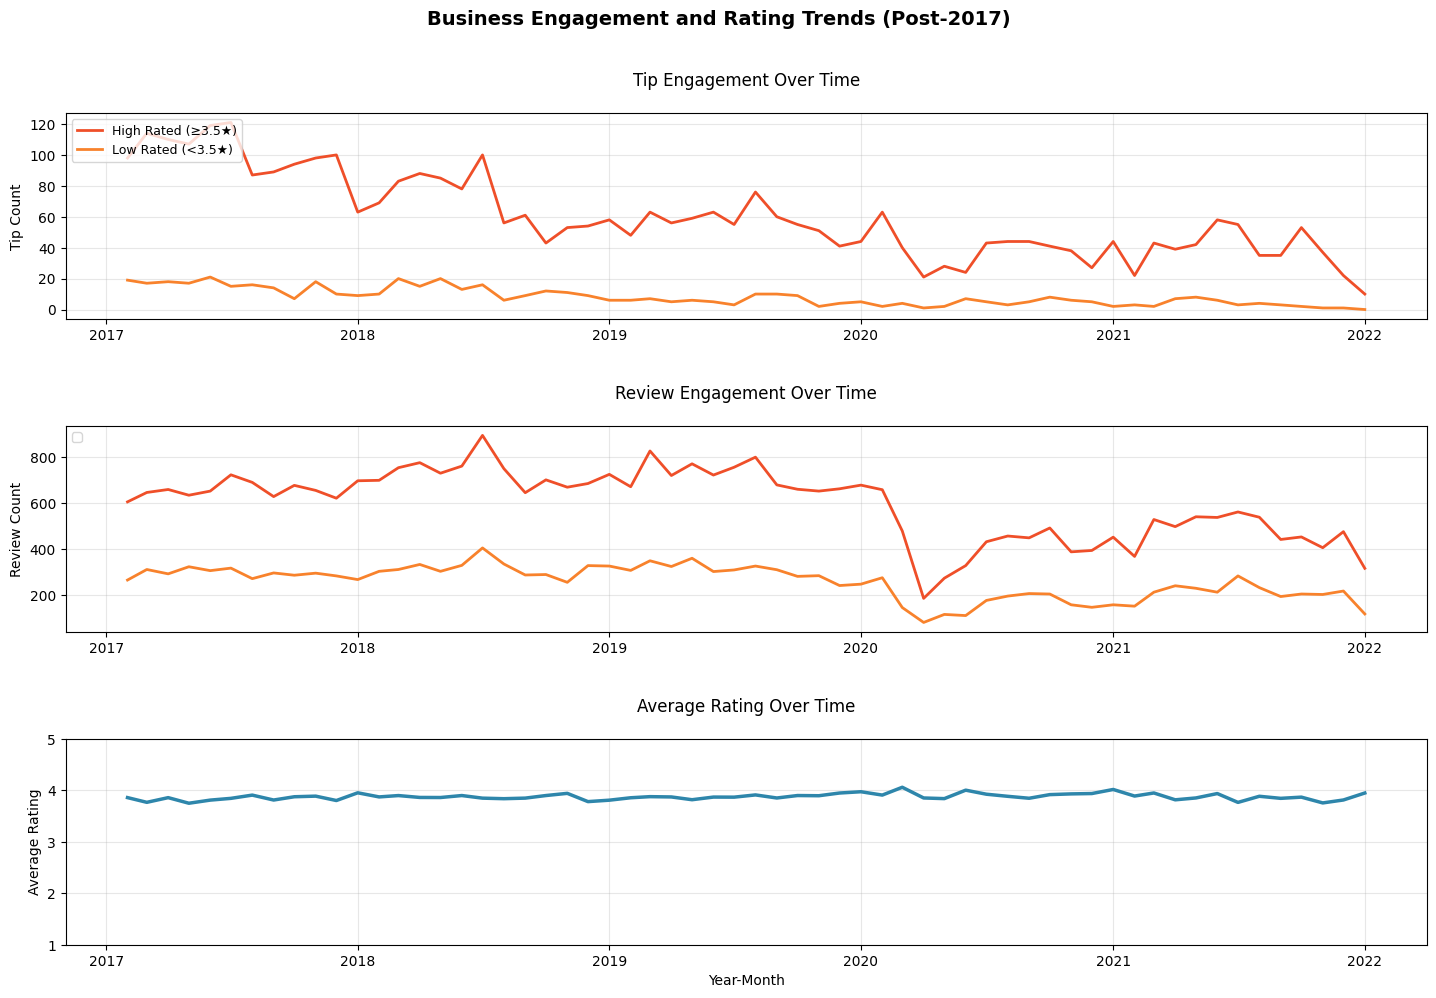

In [246]:
# Set up the figure
plt.figure(figsize=(15, 10))  # Increased height for better visibility

# Custom color palette
high_color = '#EF4F29'  # Fixed color codes (removed invalid 'E' and 'G')
low_color = '#F8822C'
avg_color = '#2E86AB'   # Added distinct color for average ratings

# 1. Tip Engagement Plot
plt.subplot(3, 1, 1)
plt.title('Tip Engagement Over Time', fontsize=12, pad=20)
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], 
         label='High Rated (≥3.5★)', color=high_color, linewidth=2)
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], 
         label='Low Rated (<3.5★)', color=low_color, linewidth=2)
plt.ylabel('Tip Count', fontsize=10)
plt.legend(loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)

# 2. Review Engagement Plot
plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time', fontsize=12, pad=20)
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], 
         color=high_color, linewidth=2)
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], 
         color=low_color, linewidth=2)
plt.ylabel('Review Count', fontsize=10)
plt.legend(loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)

# 3. Average Rating Plot
plt.subplot(3, 1, 3)
plt.title('Average Rating Over Time', fontsize=12, pad=20)
plt.plot(time_rating['month_year'], time_rating['avg_rating'], 
         color=avg_color, linewidth=2.5)
plt.ylabel('Average Rating', fontsize=10)
plt.xlabel('Year-Month', fontsize=10)
plt.ylim(1, 5)  # Set rating scale from 1-5
plt.grid(True, alpha=0.3)

# Improve overall layout
plt.tight_layout(pad=3.0)

# Add super title
plt.suptitle('Business Engagement and Rating Trends (Post-2017)', 
             y=1.02, fontsize=14, fontweight='bold')

plt.show()

In [247]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

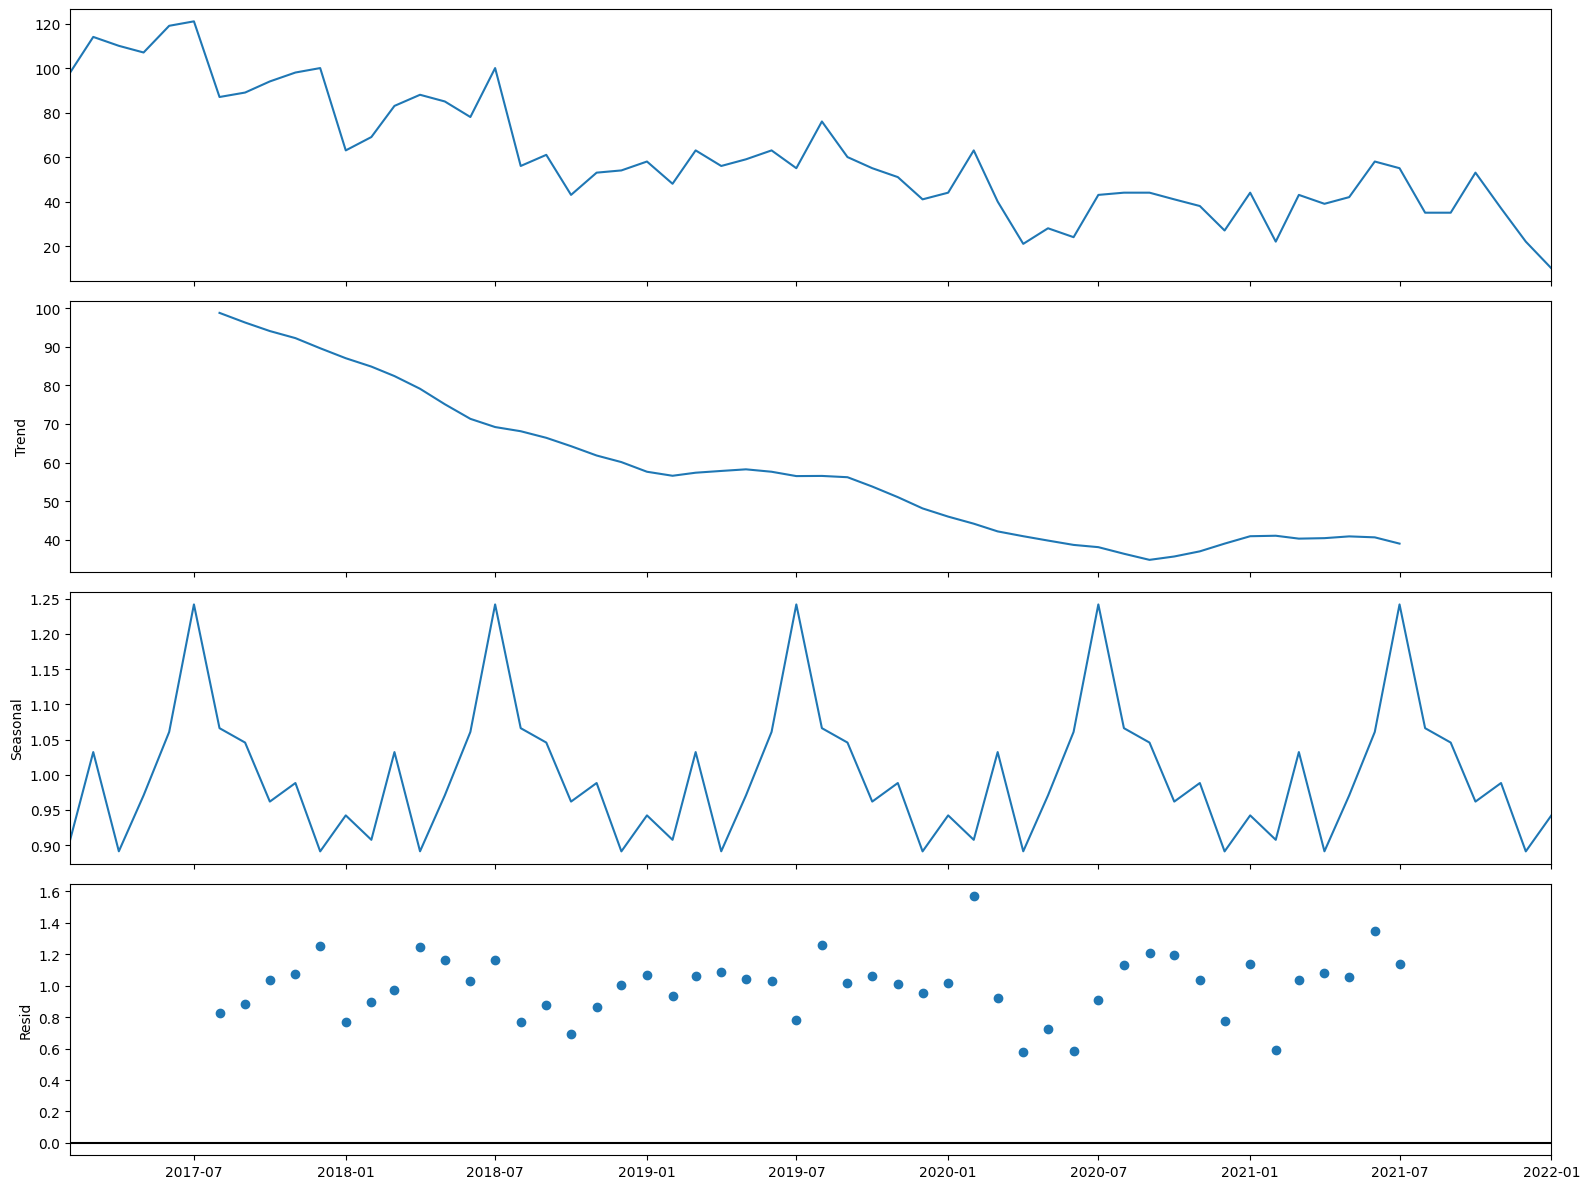

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                  model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

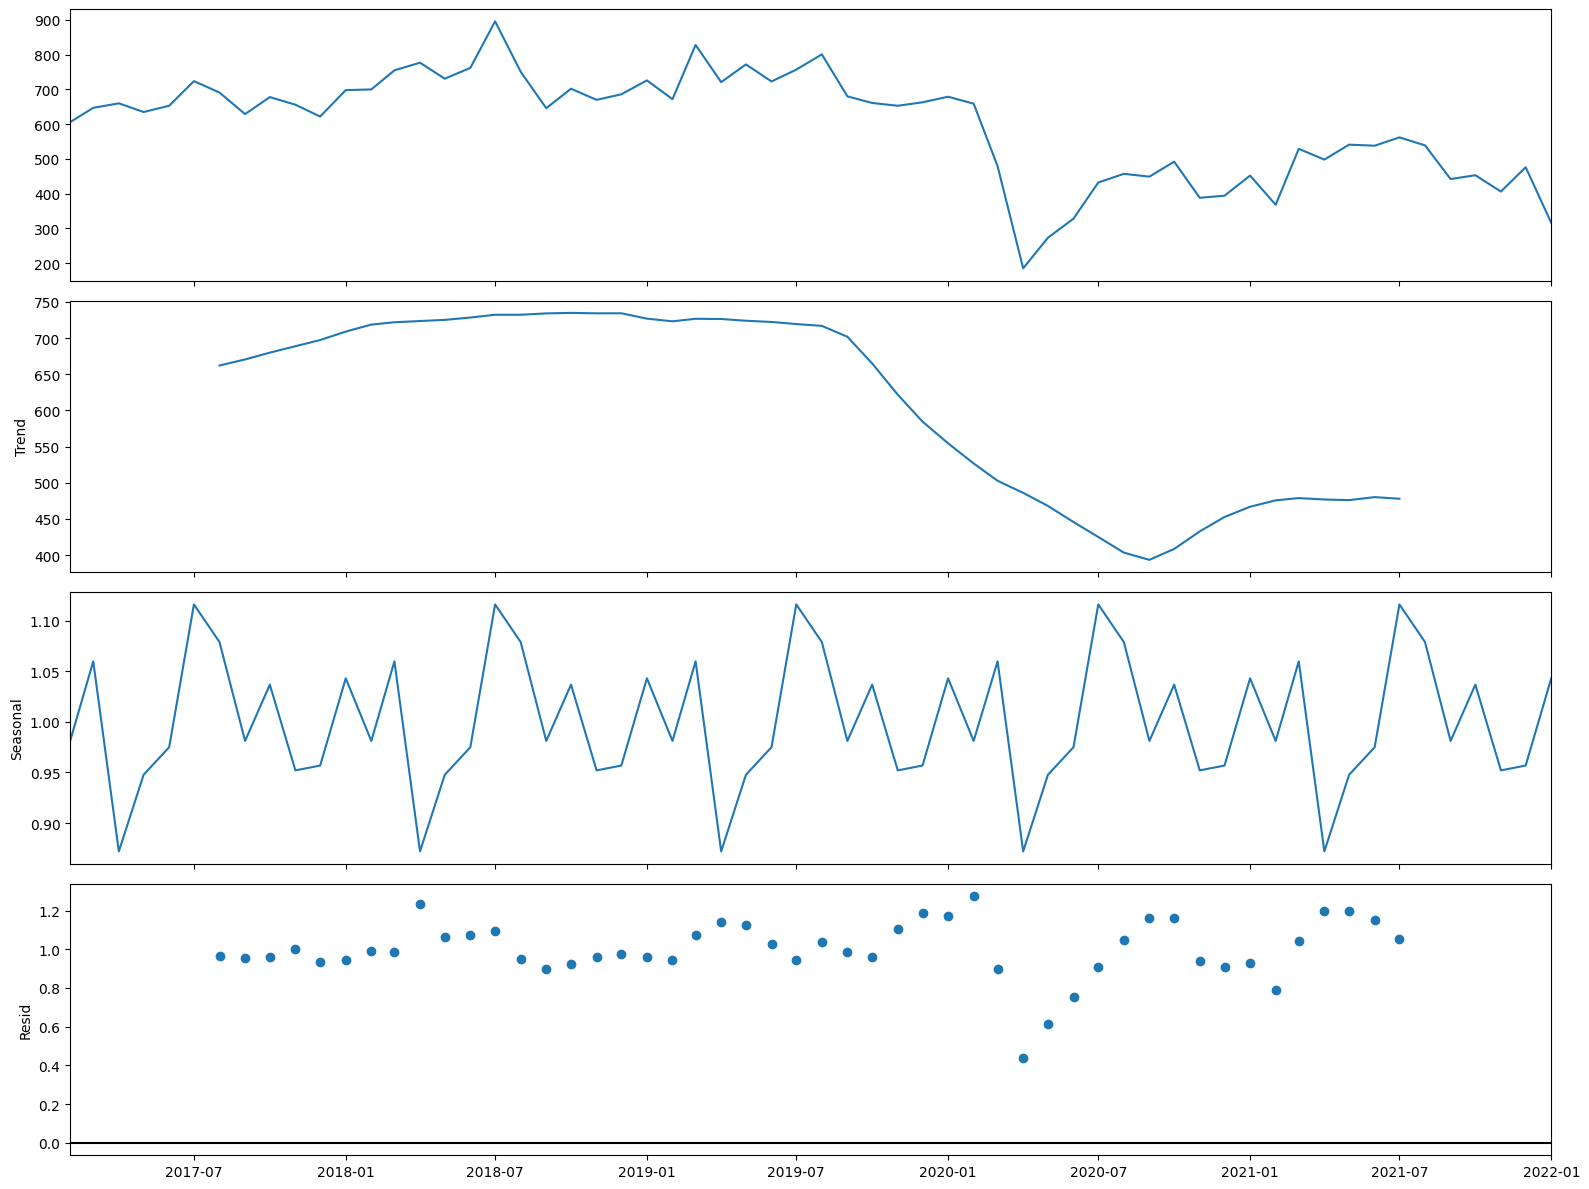

In [249]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                  model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

In [193]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

In [213]:
sentiment_query = """
SELECT 
    b.business_id,
    b.stars as avg_rating,
    b.review_count,
    AVG(CASE WHEN r.text LIKE '%great%' OR r.text LIKE '%awesome%' THEN 1 ELSE 0 END) as positive_sentiment,
    AVG(CASE WHEN r.text LIKE '%bad%' OR r.text LIKE '%terrible%' THEN 1 ELSE 0 END) as negative_sentiment,
    AVG(r.useful) as avg_useful
FROM 
    business b
JOIN 
    review r ON b.business_id = r.business_id
WHERE 
    b.categories LIKE '%Restaurants%'
GROUP BY 
    b.business_id, b.stars, b.review_count
"""

sentiment_data = pd.read_sql_query(sentiment_query, con=conn)

In [215]:
sentiment_data = remove_outliers(sentiment_data,'review_count')
sentiment_data = remove_outliers(sentiment_data,'useful_count')
sentiment_data = remove_outliers(sentiment_data,'funny_count')
sentiment_data = remove_outliers(sentiment_data,'cool_count')

Bounds for 'review_count': Lower = -101.0, Upper = 203.0


In [216]:
sentiment_data['success_score'] = calculate_success_metric(sentiment_data)

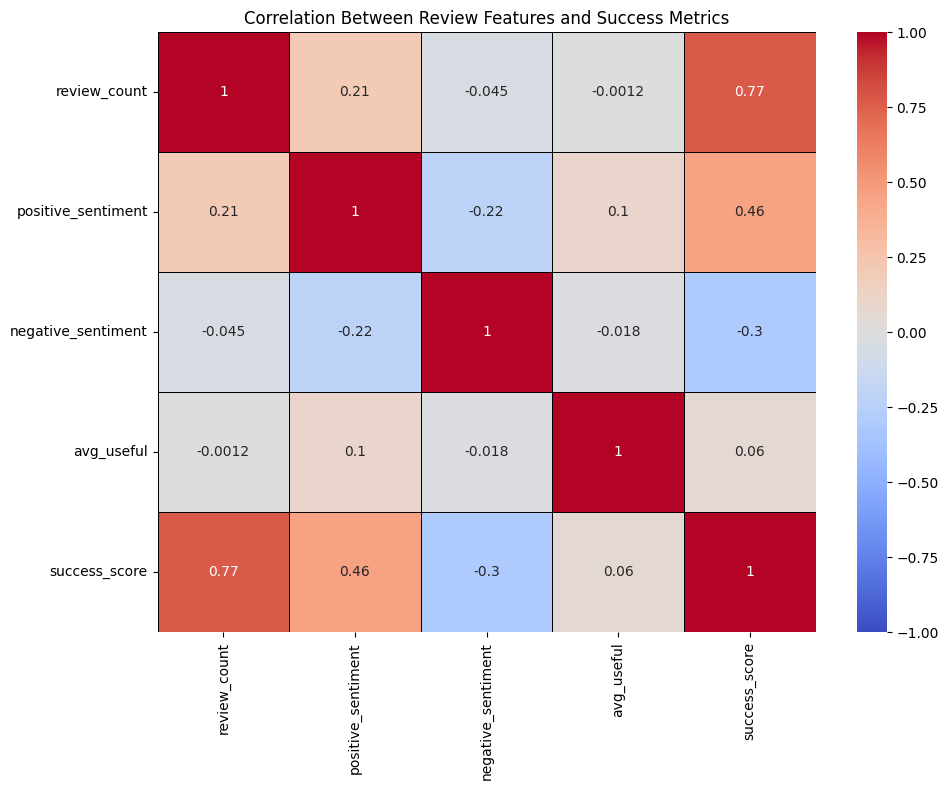

In [221]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    sentiment_data.iloc[:,2:].corr(), 
    cmap='coolwarm',  # Using a standard colormap
    annot=True, 
    linewidths=0.5, 
    linecolor='black',
    vmin=-1,  # Ensure color scale ranges from -1 to 1
    vmax=1,
    center=0
)
plt.title("Correlation Between Review Features and Success Metrics")
plt.tight_layout()
plt.show()

In [226]:
# Is there any difference in engagement of elite users and non elite users?
# Corrected query to compare elite vs non-elite user engagement
elite_df = pd.read_sql_query("""
    SELECT
        CASE
            WHEN elite = '' OR elite IS NULL THEN 'Not Elite'
            ELSE 'Elite'
        END AS user_type,
        COUNT(*) AS user_count,
        SUM(review_count) AS total_reviews,
        AVG(review_count) AS avg_reviews_per_user,
        SUM(useful) AS total_useful_votes,
        SUM(funny) AS total_funny_votes,
        SUM(cool) AS total_cool_votes,
        AVG(fans) AS avg_fans
    FROM
        user
    GROUP BY
        user_type
    ORDER BY
        user_type DESC
""", conn)

print(elite_df)

   user_type  user_count  total_reviews  avg_reviews_per_user  \
0  Not Elite     1896699       26021235             13.719222   
1      Elite       91198       20484441            224.615024   

   total_useful_votes  total_funny_votes  total_cool_votes   avg_fans  
0            24719228            6823153           7335042   0.407638  
1            59361530           26912525          39962820  23.471721  


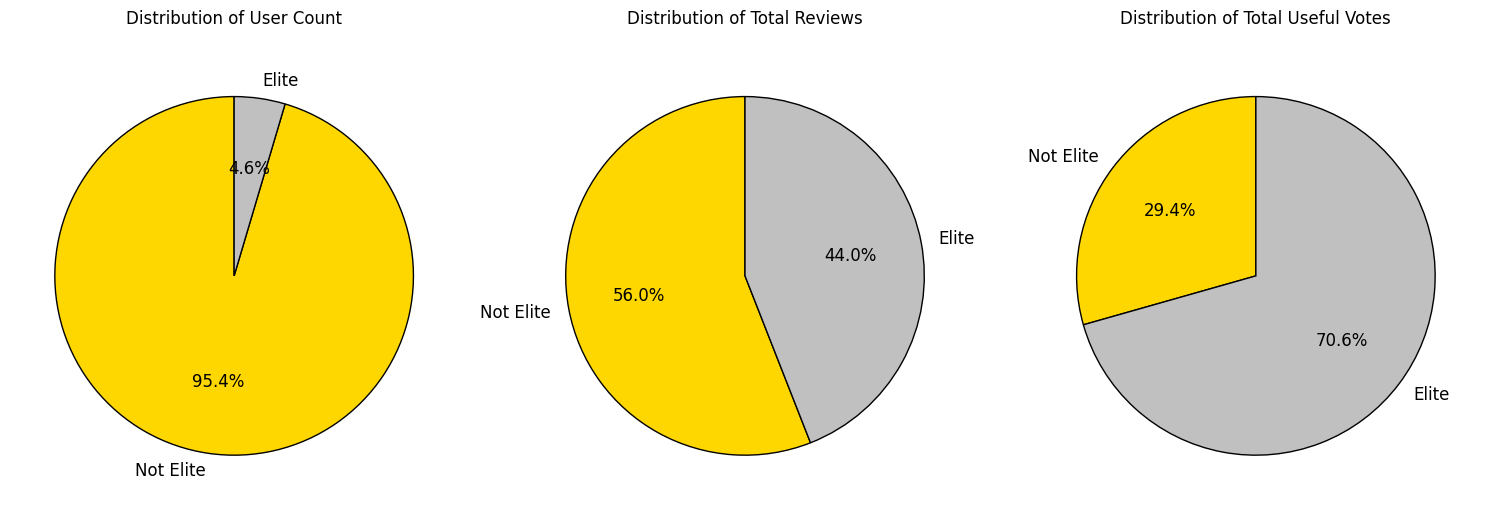

In [229]:
metrics_to_visualize = ['user_count', 'total_reviews', 'total_useful_votes']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_to_visualize, 1):
    plt.subplot(1, 3, i)
    plt.pie(
        elite_df[metric],
        labels=elite_df['user_type'],
        colors=['#FFD700', '#C0C0C0'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12}
    )
    plt.title(f'Distribution of {metric.replace("_", " ").title()}', pad=20)
plt.tight_layout()
plt.show()

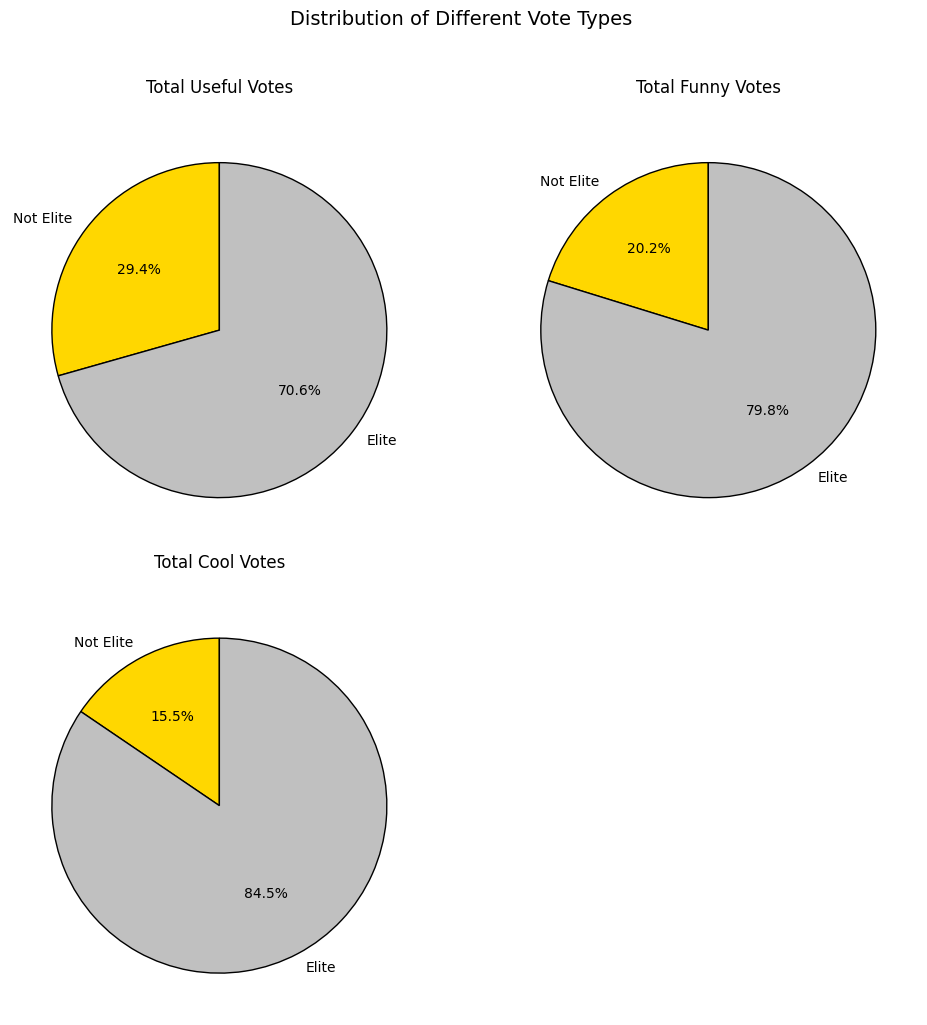

In [230]:
vote_types = ['total_useful_votes', 'total_funny_votes', 'total_cool_votes']
vote_data = elite_df.set_index('user_type')[vote_types].T

plt.figure(figsize=(10, 10))
for i, (vote_type, data) in enumerate(zip(vote_types, vote_data.values), 1):
    plt.subplot(2, 2, i)
    plt.pie(
        data,
        labels=elite_df['user_type'],
        colors=['#FFD700', '#C0C0C0'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    plt.title(vote_type.replace('_', ' ').title(), pad=20)
plt.suptitle('Distribution of Different Vote Types', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

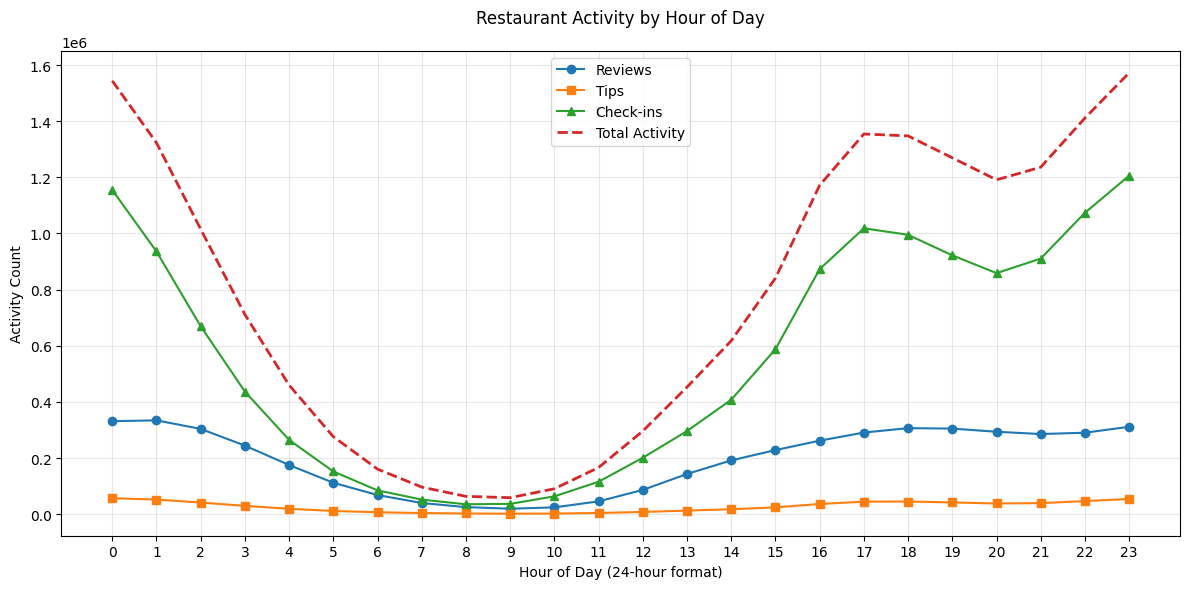

Busiest Restaurant Hours:
    hour  total_activity
23    23         1572220
0      0         1543751
22    22         1411269


In [233]:
# what are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""
    SELECT
        CAST(strftime('%H', date) AS integer) AS hour,
        COUNT(*) AS review_count
    FROM
        review
    WHERE
        business_id IN (SELECT business_id FROM business WHERE categories LIKE '%Restaurants%')
    GROUP BY
        hour
    ORDER BY
        hour;
""", conn)


tip_engagement = pd.read_sql_query("""
    SELECT
        CAST(strftime('%H', date) AS integer) AS hour,
        COUNT(*) AS tip_count
    FROM
        tip
    WHERE
        business_id IN (SELECT business_id FROM business WHERE categories LIKE '%Restaurants%')
    GROUP BY
        hour
    ORDER BY
        hour;
""", conn)


checkin = pd.read_sql_query("SELECT date FROM checkin", conn)


checkin_engagement = []
for i in checkin['date']:
    if pd.notna(i):  # Handle NaN values
        checkin_engagement.extend([
            datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") 
            for j in i.split(',')
        ])

checkin_engagement = pd.DataFrame(checkin_engagement, columns=['hour']).astype(int)
checkin_engagement = checkin_engagement.groupby('hour').size().reset_index(name='checkin_count')


busy_hours = review_engagement.merge(
    tip_engagement, on='hour', how='outer'
).merge(
    checkin_engagement, on='hour', how='outer'
).fillna(0)


busy_hours['total_activity'] = (
    busy_hours['review_count'] + 
    busy_hours['tip_count'] + 
    busy_hours['checkin_count']
)


plt.figure(figsize=(12, 6))
plt.plot(
    busy_hours['hour'], 
    busy_hours['review_count'], 
    label='Reviews', 
    marker='o'
)
plt.plot(
    busy_hours['hour'], 
    busy_hours['tip_count'], 
    label='Tips', 
    marker='s'
)
plt.plot(
    busy_hours['hour'], 
    busy_hours['checkin_count'], 
    label='Check-ins', 
    marker='^'
)
plt.plot(
    busy_hours['hour'], 
    busy_hours['total_activity'], 
    label='Total Activity', 
    linestyle='--', 
    linewidth=2
)

plt.title('Restaurant Activity by Hour of Day', pad=20)
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Activity Count')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Find peak hours
peak_hours = busy_hours.sort_values('total_activity', ascending=False).head(3)
print("Busiest Restaurant Hours:")
print(peak_hours[['hour', 'total_activity']])

